# Исследование объявлений о продаже квартир

## Описание проекта
У нас есть данные от сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Нам необходимо выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Перед нами стоит задача установить *параметры* для определения рыночной стоимости квартиры. В дальнейшем это позволит построить автоматизированную систему,которая будет отслеживать аномалии и мошенническую деятельность.

## Цели проекта
- Изучить как различные параметры квартиры влияют на её продажу и стоимость;
- Выяснить как отличается цена 1 кв.метра в зависимости от месторасположения населенного пункта;
- Посчитать среднюю стоимость одного км, т.е. выяснить как стоимость объектов зависит от расстояния до центра города;
- Научиться определять рыночную стоимость объектов недвижимости.

## Описание данных
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)\
`balcony` — число балконов\
`ceiling_height` — высота потолков (м)\
`cityCenters_nearest` — расстояние до центра города (м)\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\
`first_day_exposition` — дата публикации\
`floor` — этаж\
`floors_total` — всего этажей в доме\
`is_apartment` — апартаменты (булев тип)\
`kitchen_area` — площадь кухни в квадратных метрах (м²)\
`last_price` — цена на момент снятия с публикации\
`living_area` — жилая площадь в квадратных метрах (м²)\
`locality_name` — название населённого пункта\
`open_plan` — свободная планировка (булев тип)\
`parks_around3000` — число парков в радиусе 3 км\
`parks_nearest` — расстояние до ближайшего парка (м)\
`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)\
`rooms` — число комнат\
`studio` — квартира-студия (булев тип)\
`total_area` — общая площадь квартиры в квадратных метрах (м²)\
`total_images` — число фотографий квартиры в объявлении

## План работы
1. Изучить данные
2. Обработать данные
3. Провести анализ вляния параметров квартиры на её стоимость
4. Визуализировать результаты
5. Сделать общий вывод

### Откройте файл с данными и изучите общую информацию. 

Импортируем таблицу `pandas`

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

Открываем файл `/datasets/real_estate_data.csv`

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

Выведем первые пять строк датасета для ознакомления с данными

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем общую информацию о датасете

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы по каждому столбцу из датафрейма.
Мы видим только 17 гистограм, а столбцов у нас 22, все потому что тип данных у 5 столбцов не является количественными значениями. Если посмотреть на общую информацию о датафрейме, столбцов с *неправильным* типом данных примерно половина. Мы исправим эту проблему в следующем шаге, а пока посмотрим на гистограммы.

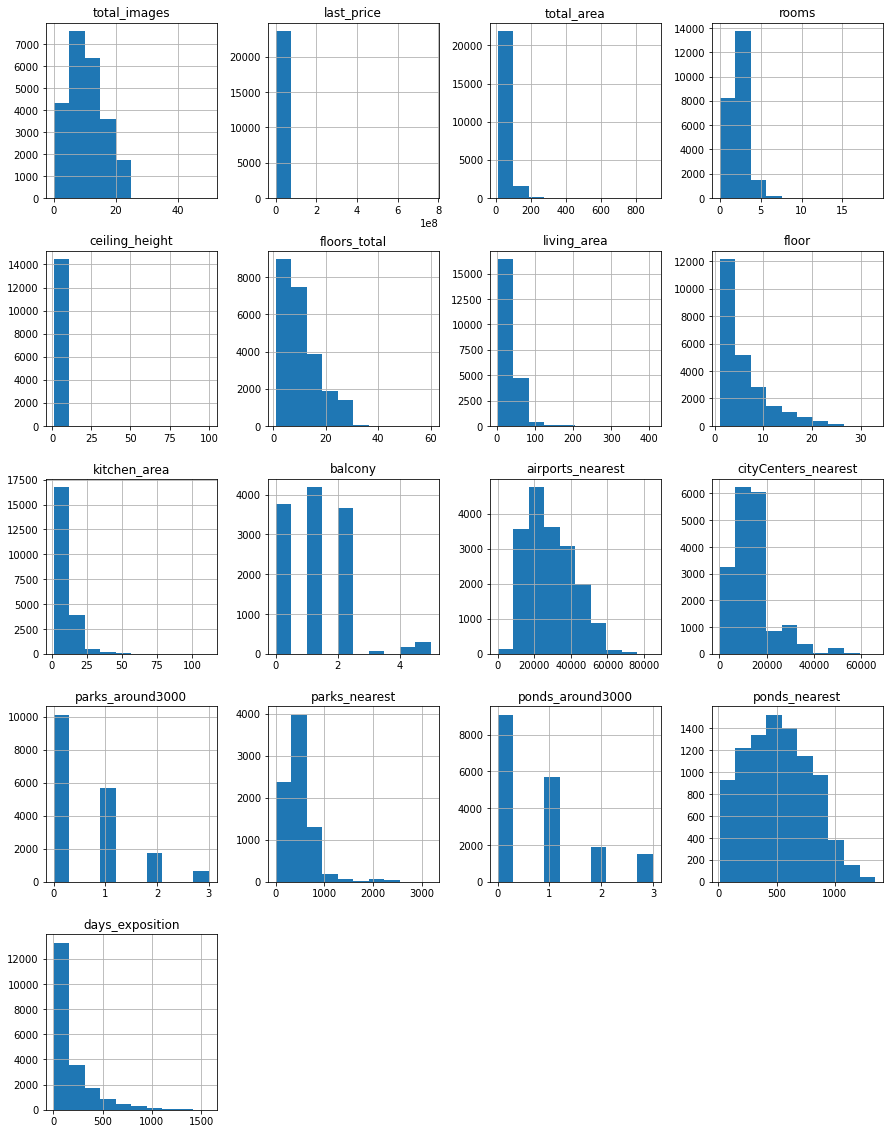

In [6]:
data.hist(figsize = (15,20));

После ознакомления с таблицей, общей информацией о датафрейме и гистограммами по значениям столбцов таблицы, можно сделать вывод:
  - в некоторых столбцах таблицы указаны *неверные* типы данных;
  - в датафрейме есть большое количество пропусков, которые предстоит исправить;
  - гистограммы, построенные на *правильных* типах данных выглядят правдоподобно. \
  
  Но сейчас ещё рано делать выводы, в следующем шаге займемся пропусками, дубликатами, типами данных и обработаем аномальные значения в таблице.

### Предобработка данных

Первое, что необходимо сделать устранить пропуски в данных, этим мы и займемся. Для этого ещё раз выведем информацию о датафрейме.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

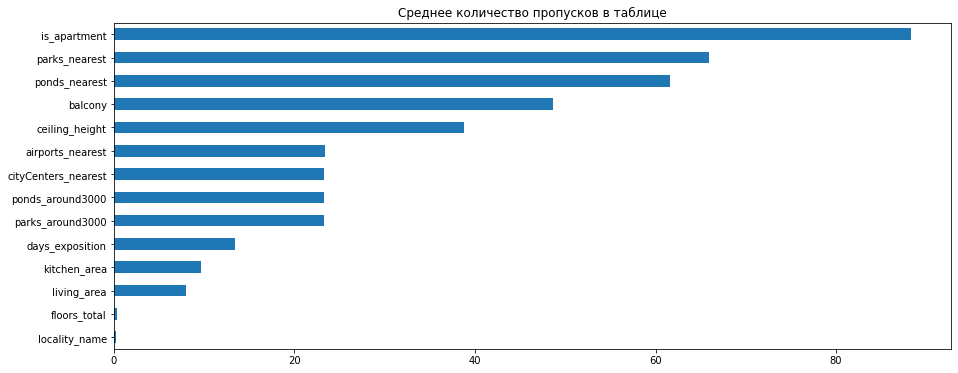

In [8]:
(data.isna().mean()*100)\
    .to_frame()\
    .rename(columns = {0:'number'})\
    .query('number > 0')\
    .sort_values(by= 'number')\
    .plot(kind = 'barh', title = 'Среднее количество пропусков в таблице', figsize = (15,6), legend = False);


Приведем в порядок название столбца `cityCenters_nearest`, используем нижний регистр и нижнее подчеркивание 

In [11]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})

Проверим изменение

In [12]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Заменив название столбца, можно приступать к работе с пропусками, но сначала посмотрим есть ли какие то артефакты в столбцах, где нет пропусков. Например, в столбце `last_price` при просмотре квартир стоимостью больше 200000000 , была обнаружена `странная` квартира со стоимостью 28 миллионов 840 рублей, очень похоже на ошибку, поэтому мы уберем эту строку из датафрейма

In [13]:
data.loc[data['last_price'] > 200000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,...,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN


Информация о `странной` квартире её мы удалим по индексу строки

In [14]:
data.loc[19272]

total_images                             14
last_price                        2750000.0
total_area                             60.0
first_day_exposition    2017-07-28T00:00:00
rooms                                     1
ceiling_height                          3.0
floors_total                            3.0
living_area                            40.0
floor                                     3
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           14.0
balcony                                 1.0
locality_name                      Коммунар
airports_nearest                        NaN
city_centers_nearest                    NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                         8.0
Name: 19272, dtype: object

In [15]:
data.drop(19272, axis = 0, inplace = True)

Проверим правильность выполнения команды (при удалении обязательно восстанавливаем индексацию, иначе ничего дальше не будет работать)

In [16]:
data.loc[data['last_price'] > 200000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,...,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN


Изменинм тип данных в столбце `last_price` с типа `float` на `int`

In [17]:
data['last_price'] = round(data['last_price'].astype('int'))

С ценой вроде разобрались, теперь столбец `total_images` оставим как есть, так как часть населения может просто не уметь пользоваться функционалом сервиса

В столбце `total_area` были просмотрены пять наибольших и пять наименьших по метражу квартир. У наибольших лидером стала квартира с площадью 900 метров квадратных и 12 комнатами, но сумма жилой площади + кухонная зона почти в 2 раза меньше общей площади, это подозрительно, поэтому эту строку мы тоже удалим, чтобы она нам не искажала статистику. У 5 наименьших квартир данные корректны.

In [18]:
data.nlargest(5, ['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


In [19]:
data.nsmallest(5, ['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
17961,3,1400000,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19807,0,3800000,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19558,2,1686000,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0


Удаляем квартиру с площадью 900.0 по индексу строки

In [20]:
data.drop(12512, axis = 0, inplace = True)

In [21]:
data.nlargest(5, ['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


Проверим столбец `rooms`на уникальные значения, и удалим неправдоподобные квартиры

In [22]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [23]:
data = data[data['rooms'] <= 6].reset_index(drop = True)

In [24]:
data['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 0])

Из столбцов с нулем остался столбец с количеством комнат, который проверять нет смысла, и столбец `first_day_data` в котором нужно изменить тип данных на `datetime64`

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Проверим произошли ли изменения в информации о таблице и посмотрим как теперь выглядит дата в таблице

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23607 entries, 0 to 23606
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23607 non-null  int64         
 1   last_price            23607 non-null  int64         
 2   total_area            23607 non-null  float64       
 3   first_day_exposition  23607 non-null  datetime64[ns]
 4   rooms                 23607 non-null  int64         
 5   ceiling_height        14437 non-null  float64       
 6   floors_total          23521 non-null  float64       
 7   living_area           21711 non-null  float64       
 8   floor                 23607 non-null  int64         
 9   is_apartment          2770 non-null   object        
 10  studio                23607 non-null  bool          
 11  open_plan             23607 non-null  bool          
 12  kitchen_area          21340 non-null  float64       
 13  balcony         

In [27]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Из таблицы видно, что мы имеем 22 столбца по 23699 строк, но в 14 столбцах обнаружены пропуски, нужно выяснить их природу.
Для того чтобы получше познакомиться с количеством пропусков вызовем метод `isna()` к датафрейму

In [28]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9170
floors_total               86
living_area              1896
floor                       0
is_apartment            20837
studio                      0
open_plan                   0
kitchen_area             2267
balcony                 11467
locality_name              49
airports_nearest         5538
city_centers_nearest     5516
parks_around3000         5515
parks_nearest           15593
ponds_around3000         5515
ponds_nearest           14553
days_exposition          3152
dtype: int64

Теперь мы видим количество пропусков в каждом столбце, поработаем с каждым столбом в отдельности. Начнем со столбца с наибольшим количеством пропусков - это `is_apartment`, для начала заменим пропуски имеющиеся в столбце на False, это логично, потому что аппартаментов не так много в городе, и не каждый человек будут продавать нежилое помещение, где нельзя сделать прописку.

In [29]:
data['is_apartment'] = data['is_apartment'].fillna(False)

После замены пропусков изменим тип данных, так как в описании данных нам ясно дали понять, что у столбца `is_appartment` тип данных должен быть `bool`, а не `object`

In [30]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Проверим изменения, посмотрев количество пропусков, уникальные значения в столбце и распределение данных по этим значениям.

In [31]:
data['is_apartment'].isna().sum()

0

In [32]:
data['is_apartment'].unique()

array([False,  True])

In [33]:
data['is_apartment'].value_counts()

False    23558
True        49
Name: is_apartment, dtype: int64

Со столбцом `is_apartment` разобрались. Далее будем двигаться по порядку столбцов с пропусками. Посмотрим на столбец `ceiling_height`

In [34]:
data['ceiling_height'].isna().sum()

9170

В столбце `ceiling_height` обнаружено 9195 пропусков, заменим их на среднюю высоту потолков в квартирах, это примерно 2.7 метров, так как далее мы не будем проводить анализ по этому столбцу

In [35]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.7)

Проверим количество пропусков теперь, вроде все работает, но есть ещё одна проблема потолки с высотой 26 или 100 метров

In [36]:
data['ceiling_height'].isna().sum()

0

Для этого посмотрим на список уникальных значений столбца. Количество *неправильных значений высоты потолка* не превышают 10 % всей инвормации, поэтому можно их удалить.

In [37]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.3 ,   3.31,   3.32,   3.33,
         3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,
         3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.51,
      

Теперь перезапишем датафрейм с значениями `ceiling_height` на реальную высоту потолков в квартире (от 2.0 до 4.5 метров включительно)

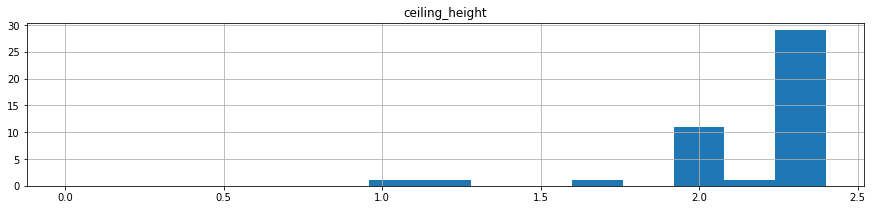

In [39]:
# check
data.hist(column = 'ceiling_height', bins = 15, figsize = (15,3), range = (0,2.4));

In [40]:
data = data[(data['ceiling_height'] >=2.45) & (data['ceiling_height'] <= 4.5)].reset_index(drop = True)

In [42]:
data['ceiling_height'].sort_values().unique()

array([2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55,
       2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66,
       2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77,
       2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88,
       2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99,
       3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 ,
       3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22,
       3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.3 , 3.31, 3.32, 3.33, 3.34,
       3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.44, 3.45, 3.46, 3.47,
       3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58,
       3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75,
       3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 ,
       3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.25,
       4.3 , 4.37, 4.4 , 4.45, 4.5 ])

In [43]:
data['ceiling_height'].describe()

count    23522.000000
mean         2.714128
std          0.206695
min          2.450000
25%          2.600000
50%          2.700000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

Теперь в таблице только значения с *нормальной высотой потолков*, работаем дальше

В столбце `floors_total` 86 пропусков, заполним их этажностью квартиры. После этого изменим тип данных в столбце и приведем его к типу `int`

In [44]:
data['floors_total'].isna().sum()

86

#### check floors

In [45]:
data.loc[data['floors_total'].isna(),'floors_total'] = data['floors_total'].fillna(data['floor'])

In [46]:
data['floors_total'].isna().sum()

0

In [49]:
floor_check = data['floors_total'] >= data['floor']

In [50]:
floor_check.value_counts()

True    23522
dtype: int64

In [51]:
data['floors_total'] = data['floors_total'].astype('int')

Столбец `living_area` будем расчитывать по формуле (`total_area` - `kitchen_area`), если пропуски будут и в `kitchen_area`, то поставим второе условие для заполнения пропусков (`total_area` / 2). По этому же принципу посчитаем `kitchen_area`

In [52]:
data['living_area'].isna().sum()

1889

In [53]:
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])
data['living_area'] = data['living_area'].fillna(data['total_area'] /2)

In [54]:
data['living_area'].isna().sum()

0

In [55]:
data['kitchen_area'].isna().sum()

2251

In [56]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] /2)

In [57]:
data['kitchen_area'].isna().sum()

0

Проверим замену пропущенных значений, для этого сделаем запрос, где `total_area` будет больше или равна сумме жилой площади и площади кухни 

In [58]:
data.query('total_area >= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.70,11,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.70,14,79.50,9,False,...,79.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23518,14,3100000,59.00,2018-01-15,3,2.70,5,38.00,4,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23519,18,2500000,56.70,2018-02-11,2,2.70,3,29.70,1,False,...,27.00,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23520,13,11475000,76.75,2017-03-28,2,3.00,17,53.45,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Проверим квартиры, где общая площадь меньше, чем площадь кухни и жилой зоны. Таких квартир 66, это аномалии в данных, поэтому удалим такие квартиры.

In [59]:
data.query('total_area < (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000,30.20,2018-02-14,1,2.65,9,26.10,5,False,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
542,9,4700000,23.80,2018-12-28,1,2.70,18,20.00,9,False,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
548,8,3100000,31.59,2018-03-08,1,2.70,19,30.55,2,False,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
596,12,5600000,53.70,2017-04-18,2,2.50,12,48.30,5,False,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
688,1,3364930,34.69,2014-11-27,1,2.64,25,23.43,25,False,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21362,8,3950000,55.00,2018-10-28,2,2.60,5,52.50,1,False,...,9.00,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,58.0
21708,12,2600000,34.30,2018-09-26,1,2.50,9,30.60,6,False,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21755,14,11990000,91.40,2016-05-16,2,2.70,16,62.00,12,False,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21794,0,5200000,46.00,2018-07-20,2,2.70,5,44.00,5,False,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


In [60]:
data = data[data['total_area'] >= (data['kitchen_area'] + data['living_area'])].reset_index(drop = True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23456 entries, 0 to 23455
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23456 non-null  int64         
 1   last_price            23456 non-null  int64         
 2   total_area            23456 non-null  float64       
 3   first_day_exposition  23456 non-null  datetime64[ns]
 4   rooms                 23456 non-null  int64         
 5   ceiling_height        23456 non-null  float64       
 6   floors_total          23456 non-null  int64         
 7   living_area           23456 non-null  float64       
 8   floor                 23456 non-null  int64         
 9   is_apartment          23456 non-null  bool          
 10  studio                23456 non-null  bool          
 11  open_plan             23456 non-null  bool          
 12  kitchen_area          23456 non-null  float64       
 13  balcony         

Все значения заменены верно, можно двигаться дальше

Сделаем промежуточный вывод: пропуски в большинстве колонок устранены методами замены значений, за исключением столбца `ceiling_height`, где по данным у нас жили карлики с высотой потолков 1 метр и гиганты с высотой потолков 26 метров, поэтому их пришлось исключить. Оталось разобраться с оставшимися столбцами с пропусками.

In [62]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11413
locality_name              49
airports_nearest         5484
city_centers_nearest     5462
parks_around3000         5461
parks_nearest           15495
ponds_around3000         5461
ponds_nearest           14455
days_exposition          3131
dtype: int64

Разберемся с балконами, во-первых, если человек не указал количество балконов, значит их нет, во-вторых, необходимо изменить тип данных с `float` на `int`, и вот у нас не 0.0 балкона, а 0 балконов в квартире

In [63]:
data['balcony'] = data['balcony'].fillna(0)

In [64]:
data['balcony'].isna().sum()

0

In [65]:
data['balcony'] = data['balcony'].astype('int')

Удалим пропуски в столбце `locality_name` и заменим букву 'ё' на букву 'е' и 'посёлок городского типа' на 'поселок' в значениях столбца

In [66]:
data = data.dropna(subset = ['locality_name']).reset_index(drop = True)

In [67]:
data['locality_name'].isna().sum()

0

In [68]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [69]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [70]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

In [71]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [72]:
# check
data['locality_name'].nunique()

328

Заменим пропуски в столбце `parks_around3000` и `ponds_around3000` на 0, потому что, если в значениях пропуск, значит на карте нет парков по близости, и приведем значения к типу `int`

In [73]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [74]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [75]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [76]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Проверим количество пропусков в обновленной таблице

In [77]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5476
city_centers_nearest     5454
parks_around3000            0
parks_nearest           15461
ponds_around3000            0
ponds_nearest           14431
days_exposition          3130
dtype: int64

Значения в столбцах, которые были созданы по картографическим данным, трогать не будем

Остался последней столбец с периодом сколько дней публикация была размещена. Оставим эти пропуски 

In [78]:
data['days_exposition'].notnull().sum()

20277

In [79]:
data['days_exposition'].isna().sum()

3130

In [80]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors = 'coerce')

Перед тем как радоваться, что мы выиграли битву с пропусками, необходимо проверить данные на предмет аномалий. Для этого посмотрим на значения среднего, минимума и максимума в столбцах

In [81]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,407.00","23,407.00","23,407.00","20,277.00","23,407.00","23,407.00","23,407.00","23,407.00","23,407.00"
min,0.00,12.00,2.45,1.00,"12,190.00",2.00,0.00,1.00,1.00
max,6.00,507.00,4.50,"1,580.00","401,300,000.00",460.00,250.00,33.00,60.00


Посмотрим на таблицу, которая у нас получилась и рассмотрим каждый столбец. В столбце `room` минимальное количество комнат 0, так как есть квартиры студии, где вся квартира как одна комната, а максимальное количество 6, всё логично

Квартиры с площадью 12 квадратных метров вполне реально в современном мире, максимальная площадь в 507 квадратных метров тоже вполне реальна, можно двигаться дальше. Вот со столбцом `last_price` происходит что-то интересное, минимальное значение 12 190 это явно аномалия, уберем её из таблицы, теперь посмотрим на максимальное значение, оно равно 401 миллион рублей, скорее всего это тоже аномалия, поэтому её мы тоже уберем

In [82]:
data = data[(data['last_price'] > 400000) & (data['last_price'] < 400000000)].reset_index(drop = True)

Для нашего исследования рынка недвижимости, мы рассматриваем общюю картину, поэтому в столбце `total_area` квартиры с площадью более 300 метров квадратных, мы откидем, потому что это редкие случаи, таких квартир всего 30 из 20 000. Площадь кухни установим больше 4 и меньше 50, а жилую площадь больше 10 и  меньше 100, исходя из графиков ниже 

In [83]:
data.query('total_area > 300')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
155,8,96000000,317.00,2017-07-07,4,3.50,3,183.00,3,False,...,134.00,1,Санкт-Петербург,22673.0,1771.0,2,508.0,3,366.0,62.0
779,20,135000000,310.00,2018-05-22,4,3.30,5,250.00,2,False,...,50.00,0,Санкт-Петербург,34159.0,7251.0,2,295.0,3,190.0,342.0
1065,16,75000000,323.00,2017-07-10,5,4.00,5,255.70,4,False,...,66.00,0,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259.0
2207,9,130278280,304.00,2015-07-24,5,3.11,9,152.00,7,False,...,152.00,0,Санкт-Петербург,25593.0,5913.0,2,164.0,0,NaN,599.0
3622,12,28789000,441.98,2019-01-23,4,2.70,6,406.93,6,False,...,35.05,0,Санкт-Петербург,20552.0,5181.0,0,NaN,0,NaN,NaN
4975,20,35000000,380.00,2017-08-17,6,2.70,3,198.00,2,False,...,50.00,0,Пушкин,18490.0,30643.0,1,527.0,1,668.0,15.0
5809,3,230000000,500.00,2017-05-31,6,2.70,7,460.00,7,False,...,40.00,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0
6098,10,84382000,363.10,2018-10-07,3,2.70,16,331.37,12,False,...,31.73,0,Санкт-Петербург,31887.0,4979.0,0,NaN,2,182.0,NaN
6135,8,34000000,470.30,2018-01-14,4,2.70,3,248.70,3,False,...,40.00,0,Санкт-Петербург,43756.0,15459.0,1,852.0,3,122.0,179.0
6531,20,99000000,488.00,2017-04-09,5,2.95,20,216.00,17,False,...,50.00,0,Санкт-Петербург,27641.0,4598.0,1,646.0,1,368.0,351.0


In [84]:
data = data[data['total_area'] < 300].reset_index(drop = True)

In [85]:
data['total_area'].describe()

count    23373.000000
mean        59.037341
std         29.378075
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        297.500000
Name: total_area, dtype: float64

In [86]:
data['kitchen_area'].describe()

count    23373.000000
mean        11.883532
std          8.453441
min          0.000000
25%          7.200000
50%          9.800000
75%         13.000000
max        147.500000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

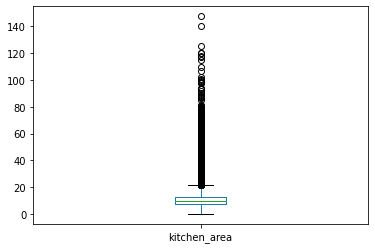

In [87]:
data['kitchen_area'].plot(kind = 'box')

<AxesSubplot:>

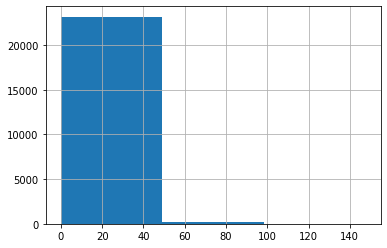

In [88]:
data['kitchen_area'].hist(bins = 3)

In [89]:
data['living_area'].describe()

count    23373.000000
mean        33.784409
std         19.237601
min          2.000000
25%         18.800000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64

<AxesSubplot:>

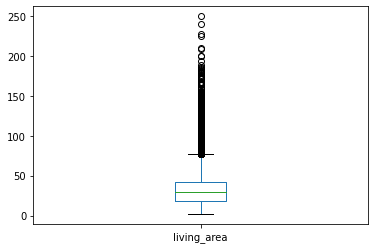

In [90]:
data['living_area'].plot(kind = 'box')

<AxesSubplot:>

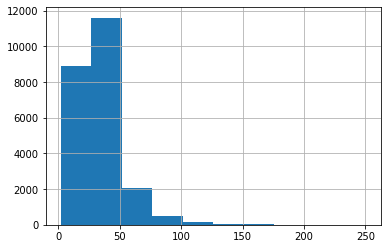

In [91]:
data['living_area'].hist()

В столбце `floors_total` оставим дома, где больше 2 этажей, но меньше 36. Посмотрим на столбец `days_exposition` 

In [92]:
data['days_exposition'].describe()

count    20248.000000
mean       180.466466
std        219.405984
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

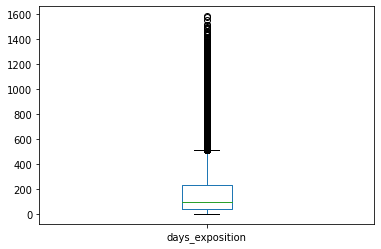

In [93]:
data['days_exposition'].plot(kind = 'box')

<AxesSubplot:>

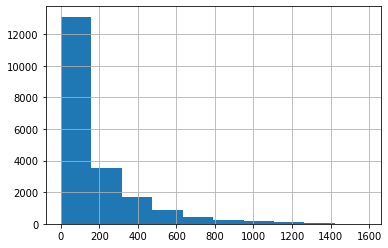

In [94]:
data['days_exposition'].hist()

Посмотрев на диаграмму размаха и гистограмму можно сделать вывод, что значения от 600 до 1600 являются редкостями, поэтому во избежании искажения результатов исследования, уберём их, также поставим нижнюю границы от 3 дней

In [95]:
data = data[(data['kitchen_area'] > 4) & (data['kitchen_area'] < 50) &\
            (data['living_area'] > 7) & (data['living_area'] < 100) &\
            (data['floors_total'] > 1) & (data['floors_total'] < 36) &\
            ((data['days_exposition'].isna()) |  (data['days_exposition'] > 3) &\
             (data['days_exposition'] < 600))].reset_index(drop = True)

Остальные столбцы кажутся вполне правдоподобными. Проверим количество пропусков в обновленной таблице и информацию о таблице

In [96]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5163
city_centers_nearest     5144
parks_around3000            0
parks_nearest           14471
ponds_around3000            0
ponds_nearest           13540
days_exposition          3007
dtype: int64

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21646 entries, 0 to 21645
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21646 non-null  int64         
 1   last_price            21646 non-null  int64         
 2   total_area            21646 non-null  float64       
 3   first_day_exposition  21646 non-null  datetime64[ns]
 4   rooms                 21646 non-null  int64         
 5   ceiling_height        21646 non-null  float64       
 6   floors_total          21646 non-null  int64         
 7   living_area           21646 non-null  float64       
 8   floor                 21646 non-null  int64         
 9   is_apartment          21646 non-null  bool          
 10  studio                21646 non-null  bool          
 11  open_plan             21646 non-null  bool          
 12  kitchen_area          21646 non-null  float64       
 13  balcony         

**Общий вывод для этапа**\
Мы обработали данные из таблицы, их стало меньше, но они стали качественнее. В ходе работы были устранены пропуски в столбцах, произведены замены значений, удалены артефакты, изменены типы данных. Далее добавим новые столбцы для дальнейшего исследования

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец `price_for_metr`, а в нем посчитаем стоимость одного квадратного метраю Для этого разделим `last_price` на `total_area`

In [107]:
data['price_for_metr'] = round(data['last_price'] / data['total_area'])

In [108]:
data['price_for_metr'] = data['price_for_metr'].astype('int')

Далее создадим столбец со значением дня недели публикации объявления из столбца `first_day_exposition`, где 0 это понедельник, а 6 это воскресенье

In [109]:
data['day_week'] = data['first_day_exposition'].dt.weekday

Создадим столбец с месяцем публикации объявления

In [110]:
data['month_exp'] = pd.DatetimeIndex(data['first_day_exposition']).month

Создадим столбец с годом публикации объявления

In [111]:
data['year_exp'] = pd.DatetimeIndex(data['first_day_exposition']).year

Создадим столбец для определения типа этажа квартиры `type_of_floor`. Проверим выполнение функции

In [112]:
def type_of_floor (row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total:
        return 'пoследний'
    
    return 'другой'

In [113]:
data['type_of_floor'] = data.apply(type_of_floor, axis = 1)

In [114]:
data['type_of_floor'].value_counts()

другой       15960
пoследний     3051
первый        2635
Name: type_of_floor, dtype: int64

Создадим столбец расстояние до центра города в километрах и округлим его до целого числа и приведем столбец к типу `int`

In [115]:
data['city_centre_km'] = round(data['city_centers_nearest'] / 1000)

In [116]:
data['city_centre_km'] = data['city_centre_km'].convert_dtypes()

Проверим все ли столбцы созданы в новой таблице и проверим тип данных в столбцах

In [117]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_week,month_exp,year_exp,type_of_floor,city_centre_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.70,11,18.6,1,False,...,NaN,0,NaN,81.0,82921,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2,574.0,558.0,92786,3,8,2015,другой,14
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8
4,10,2890000,30.40,2018-09-10,1,2.70,12,14.4,5,False,...,NaN,0,NaN,55.0,95066,0,9,2018,другой,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21641,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,352.0,1,675.0,239.0,73718,4,8,2016,другой,34
21642,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3,381.0,NaN,72491,1,3,2017,другой,4
21643,14,3100000,59.00,2018-01-15,3,2.70,5,38.0,4,False,...,NaN,0,NaN,45.0,52542,0,1,2018,другой,<NA>
21644,18,2500000,56.70,2018-02-11,2,2.70,3,29.7,1,False,...,NaN,0,NaN,NaN,44092,6,2,2018,первый,<NA>


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21646 entries, 0 to 21645
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21646 non-null  int64         
 1   last_price            21646 non-null  int64         
 2   total_area            21646 non-null  float64       
 3   first_day_exposition  21646 non-null  datetime64[ns]
 4   rooms                 21646 non-null  int64         
 5   ceiling_height        21646 non-null  float64       
 6   floors_total          21646 non-null  int64         
 7   living_area           21646 non-null  float64       
 8   floor                 21646 non-null  int64         
 9   is_apartment          21646 non-null  bool          
 10  studio                21646 non-null  bool          
 11  open_plan             21646 non-null  bool          
 12  kitchen_area          21646 non-null  float64       
 13  balcony         

**Общий вывод для этапа**\
Мы создали 6 новых столцов, которые пригодятся нам для дальнейшего анализа. Все они, за исключением столбца `city_centre_km`, не имеют пропусков, можно приступать к последнему этапу исследования

### Проведите исследовательский анализ данных

Нам необходимо посмотреть на данные, отображающие общюю площадь, жилую площадь, площадь кухни, цену объекта, количество комнат, высоту потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. 

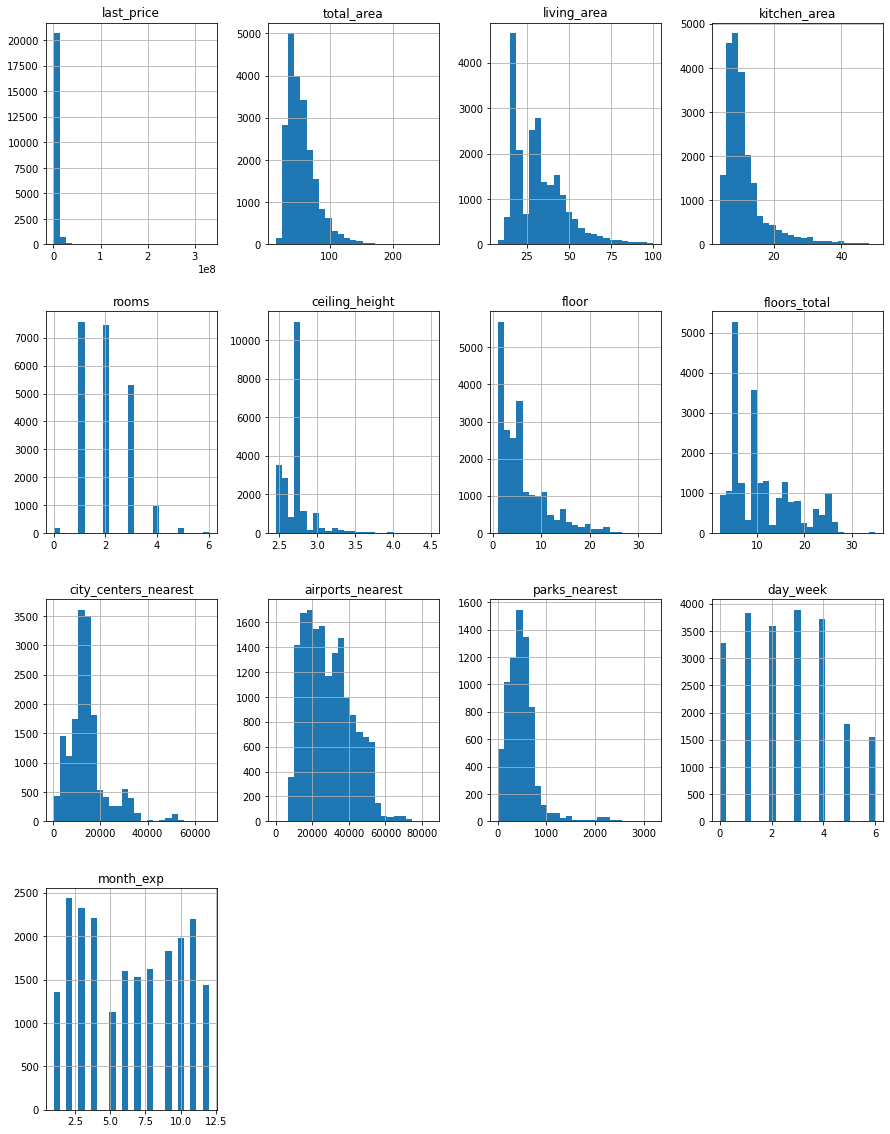

In [119]:
data.hist(column = ['last_price', 'total_area', 'living_area', 'kitchen_area',\
                    'rooms', 'ceiling_height', 'floor', 'type_of_floor', 'floors_total',\
                    'city_centers_nearest', 'airports_nearest', 'parks_nearest',\
                    'day_week', 'month_exp'], figsize = (15,20), bins = 25);

Text(0.5, 1.0, 'Распределение этажей квартир по типам')

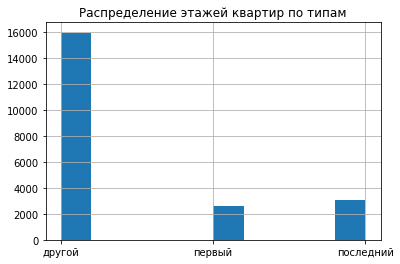

In [120]:
data['type_of_floor'].hist();
plt.title('Распределение этажей квартир по типам')


Отдельно создадим гистограмму по типу этажа квартиры, так как в общих данных по колонкам, данная гистограмма отсутствует. Из гистограммы видно, что большинство квартир находятся на последних этажах дома

Из основных графиков видно, что предпочтение отдается одно- дву- комнатным квартирам, не на первых этажах. По графиками дня недели видно, что пользователи предпочитают выкладывать объявление о продаже квартиры в будние дни, а из столбца с месяцем публикации объявления видно, что объявления выкладывают весной или осенью. Всего этажей в доме обычно меньше 10. Средняя высота потолков 2.7 метров, как мы и указывали при предобработки. Кухонная зона не более 50 метров квадратных, в среднем 10 метров квадратных, а жилая площадь не более 100 метров квадратных, в среднем 30 метров квадратных. По расстояниям трудно что-то сказать одназначно, можно только предположить, что чем ближе квартира к центру, тем меньше там парков.

Построим диаграмму столбца `days_exposition`, где посмотрим за сколько обычно продаются квартиры

Text(0.5, 1.0, 'Длительность (дней) продажи квартир')

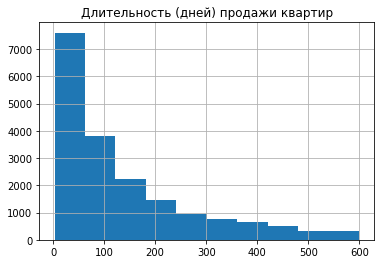

In [121]:
data['days_exposition'].hist(bins = 10);
plt.title('Длительность (дней) продажи квартир')

In [122]:
data['days_exposition'].mean()

137.9949568109877

In [123]:
data['days_exposition'].median()

88.00000000000001

In [124]:
data['days_exposition'].mode()

0    45.0
dtype: float64

In [125]:
data['days_exposition'].describe()

count    18639.000000
mean       137.994957
std        136.082612
min          3.000000
25%         42.000000
50%         88.000000
75%        193.000000
max        599.000000
Name: days_exposition, dtype: float64

На графике видно, что время продажи квартиры достаточно равномерно распределено от 0 до 600 дней. Среднее время продажи квартиры составляет 180 дней, почти полгода, медианное время состовляет чуть меньше дней - 95, это примерно 3 месяца, а мода (наиболее часто встречающееся значение) равна всего 45 дней. Самые быстрые квартиры продавались за 45 дней, а самые медленные за 231 день. Посмотрим на изменение средней скорости продаж по годам

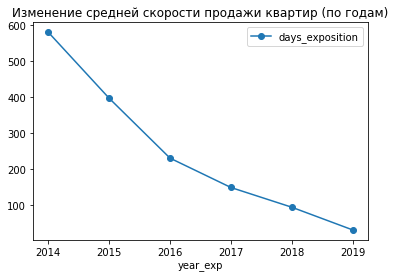

In [126]:
pd.pivot_table(data, index = ['year_exp'], values = 'days_exposition')\
    .plot(style = 'o-', title = 'Изменение средней скорости продажи квартир (по годам)');

Из графика видно, что средняя скорость продажи квартир уменьшается год от года, например, в 2014 году скорость продажи была более 800 дней, а в 2019 году уже около 50 дней (меньше на два года)

Посмотрим как цена зависит цена квартиры от следующих параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год)

Для этого посчитаем коэффициент корреляции Пирсона и построим диаграммы рассеяния для каждого из параметров

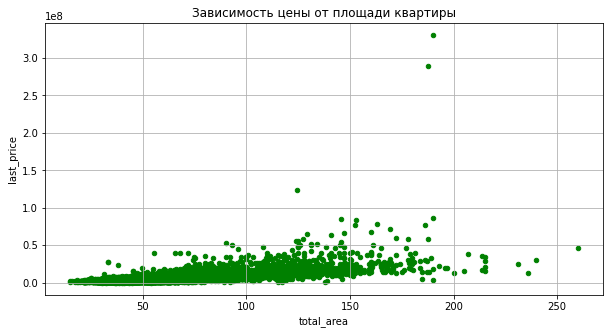

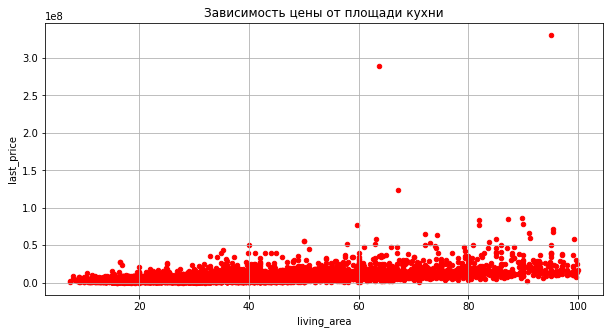

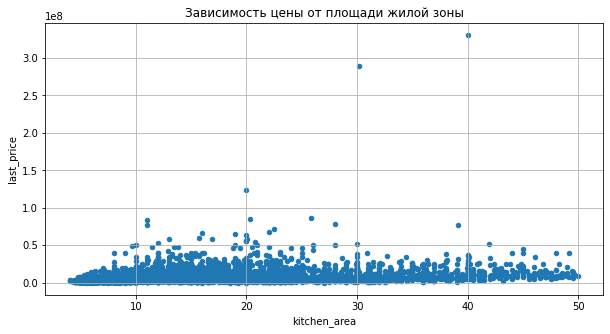

In [127]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter',\
          title = 'Зависимость цены от площади квартиры', \
          color = 'green', figsize = (10, 5), sharex=False, grid = True);
data.plot(x = 'living_area', y = 'last_price', kind = 'scatter',\
          title = 'Зависимость цены от площади кухни',\
          color = 'red', figsize = (10, 5), sharex=False, grid = True);
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter',\
          title = 'Зависимость цены от площади жилой зоны',\
          figsize = (10, 5), sharex=False, grid = True);

In [128]:
data['last_price'].corr(data['total_area'])

0.6351314314207654

По данным коэффициента корреляции Пирсона, мы имеем среднюю зависимость стоимости квартиры от общего размера квартиры, чем больше площадь квартиры, тем больше цена.

In [129]:
data['last_price'].corr(data['living_area'])

0.5213749071316286

In [130]:
data['last_price'].corr(data['kitchen_area'])

0.34614067032624146

Зависимости от площади жилой и кухонной зоны почти одинаковы, и соотносятся с выводом об общей площади, чем больше площадь, тем выше стоимость

In [131]:
data['last_price'].corr(data['rooms'])

0.3516432181807103

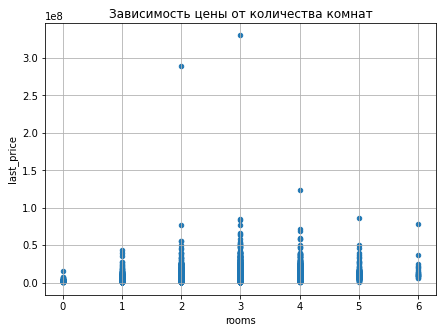

In [132]:
data.plot(x = 'rooms', y = 'last_price', kind = 'scatter',\
          title = 'Зависимость цены от количества комнат', figsize = (7, 5), sharex=False, grid = True);

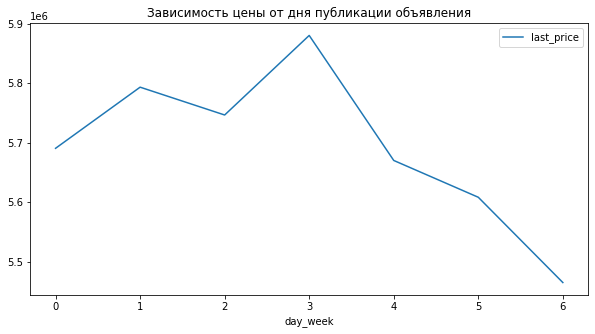

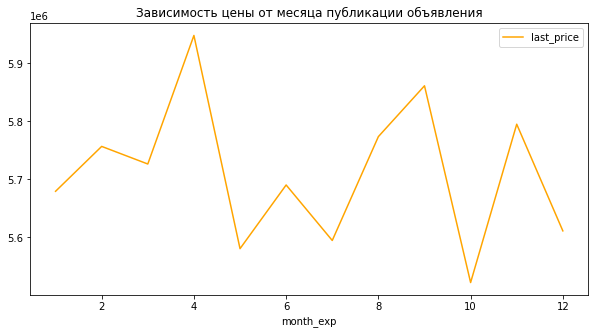

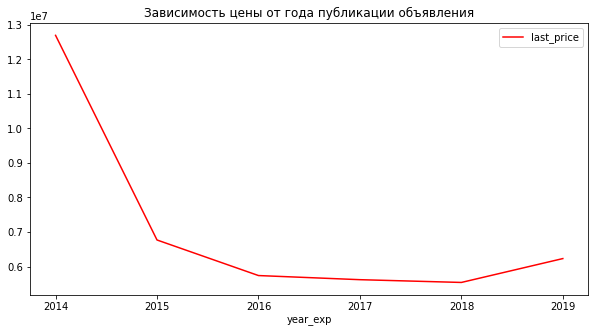

In [133]:
pd.pivot_table(data,index = ['day_week'], values = 'last_price')\
               .plot(figsize = (10, 5), title = 'Зависимость цены от дня публикации объявления');
pd.pivot_table(data,index = ['month_exp'], values = 'last_price')\
               .plot(figsize = (10, 5), color = 'orange', title = 'Зависимость цены от месяца публикации объявления');
pd.pivot_table(data,index = ['year_exp'], values = 'last_price')\
               .plot(figsize = (10, 5), color = 'red', title = 'Зависимость цены от года публикации объявления');

Очень интересная зависимость, объявления выложенные в среду имеют более высокую цену, чем объявления, выложенные в другие дни

При публикации объявления в декабре цена квартиры выше, чем при публикации в другие месяцы. Очень большой скачек вниз в октябре, предположить почему очень сложно, возможно, осенняя депрессия

По графику видно, что цена снижается начиная с 2014 года, можно предположить, что кризис 2014 года закончился и всё начало приходить в норму

In [134]:
data['last_price'].corr(data['year_exp'])

-0.008264439920273434

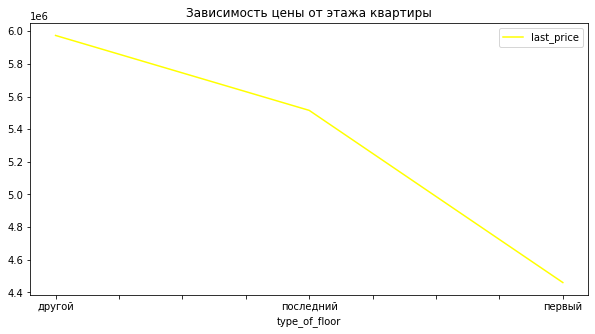

In [135]:
pd.pivot_table(data,index = ['type_of_floor'], values = 'last_price')\
               .plot(figsize = (10, 5), color = 'yellow', title = 'Зависимость цены от этажа квартиры');

Из графиков видно, что стоимость не завист ни от количества комнат, ни от дня, месяца или года, когда опубликовали объявления, ни от этажа, на котором находится квартира, стоимость зависит от общей площади квартиры, где при сравнении этих данных мы получили `коэффициент корреляции Пиросна`  равный 0.6. Кореляцию для столбцов с месяцем и днем недели, мы не считали, так как это нелинейные параметры

Теперь изучим стоимость квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений. Для этого сначала посмотрим количество объявлений в столбце `locality_name` и выведем 10 населенных пунктов с наибольшим числов объявлений

In [136]:
data['locality_name'].value_counts().nlargest(10)

Санкт-Петербург      14232
поселок Мурино         518
поселок Шушары         422
Всеволожск             369
Пушкин                 336
Колпино                326
поселок Парголово      316
Гатчина                283
деревня Кудрово        273
Выборг                 219
Name: locality_name, dtype: int64

Далее передадим индексы названий городов, которые мы получили переменной `city`

In [137]:
city = data['locality_name'].value_counts().nlargest(10).index.tolist()

Сделаем запрос, чтобы в таблице выводилась только информация о наших населенных пунктах и передадим эту таблицу переменной `city_metr`

In [138]:
city_metr = data.query('locality_name in @city')

Сгруппируем данные по населенному пункту и приведем к формату датафрейма, для наглядности построим столбчатый график

In [139]:
city_metr = city_metr.groupby('locality_name')['price_for_metr']\
                                                         .mean()\
                                                         .round(decimals = 2)\
                                                         .sort_values(ascending = False)\
                                                         .to_frame()

In [140]:
city_metr

,price_for_metr
locality_name,
Санкт-Петербург,112236.07
Пушкин,102489.32
деревня Кудрово,92774.21
поселок Парголово,90253.77
поселок Мурино,85491.64
поселок Шушары,78498.56
Колпино,75283.83
Гатчина,68911.76
Всеволожск,68729.97


<AxesSubplot:ylabel='locality_name'>

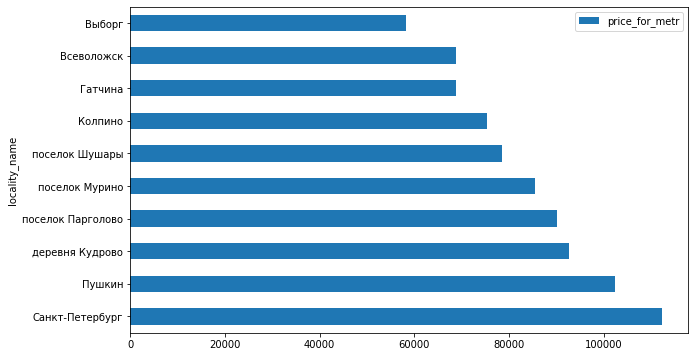

In [141]:
city_metr.plot(kind = 'barh', figsize = (10, 6), ylabel = 'price_for_metr')

Теперь у нас есть информация о самой высокой цене за метр (город Санкт-Петербург) и самой низкой цене (Выборг) в списке ТОП - 10 по количеству объявлений 

Найдем среднюю стоимость каждого километра до центра города. Для этого в переменную `spb` передадим запрос на выборку данных, где `locality_name` - Санкт_Петербург

In [142]:
spb = data.query('locality_name == "Санкт-Петербург"')

Сгруппируем данные по каждому километру от центра города и найдём среднюю стоимость

In [143]:
spb.groupby('city_centre_km')['last_price'].mean().round(decimals = 1)

city_centre_km
0     19732000.0
1     16575060.9
2     13371504.6
3      9065053.5
4     10122223.8
5     10647474.8
6     10605644.4
7     12033456.3
8      8797952.4
9      6742826.9
10     6194369.5
11     6081218.9
12     5742395.5
13     6002284.3
14     5543427.6
15     5730483.7
16     5333437.4
17     5198073.9
18     4837733.3
19     5000839.8
20     5885949.5
21     5373086.9
22     5253555.5
23     4699222.2
24     3835886.8
25     4052839.9
26     3973012.5
27     8300000.0
28     5026428.6
29     4210000.0
Name: last_price, dtype: float64

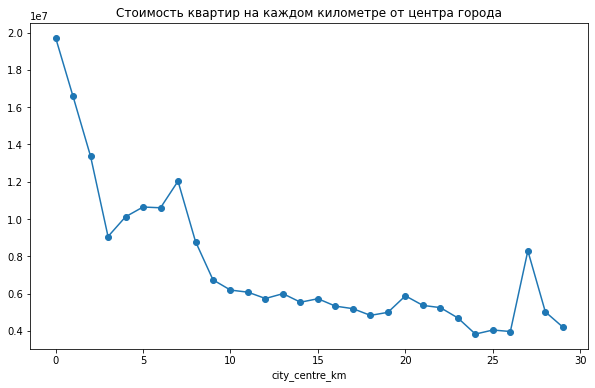

In [144]:
spb.groupby('city_centre_km')['last_price'].mean()\
                                           .round(decimals = 1)\
                                           .plot(style = 'o-',\
                                           title = 'Стоимость квартир на каждом километре от центра города',\
                                           figsize = (10, 6));

Странный пик на 27 километре, нужно проверить

In [145]:
spb.query('city_centre_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_week,month_exp,year_exp,type_of_floor,city_centre_km
669,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,NaN,128.0,193919,1,11,2017,другой,27
5452,6,2250000,32.0,2018-02-27,1,2.70,2,16.5,2,False,...,NaN,0,NaN,178.0,70312,1,2,2018,пoследний,27


In [146]:
spb['city_centre_km'].sort_values().value_counts()

12    1526
15    1489
13    1378
14    1208
16    1196
11    1094
17     828
5      705
10     670
9      540
8      536
4      534
6      501
7      372
3      284
18     241
2      234
22     193
19     150
1      138
21     108
23      81
26      53
20      44
25      26
24      25
0       15
28       7
29       5
27       2
Name: city_centre_km, dtype: Int64

Посмотрев на график, можно увидеть, что стоимость километра от 0 до 4 снижается, но потом с 4 километра до 7 идет возрастание стоимости, видимо у людей есть предпочтение жить недалеко от центра города, но не в первых четырех километров. Далее идет плавный спад, а на 27 километре неожиданный всплеск, из-за количества квартир на 27 километре, их всего 2, тогда как на других километрах их количество больше

**Общий вывод для этапа**\
В этом этапе мы изучили зависимость стоимости квартиры от параметров квартиры, и выяснили, что стоимость зависит от площади квартиры. Посмотрели на скорость продаж квартир и выяснили, что в среднем квартиры продаются за 180 дней, то есть примерно за полгода. Посчитали среднюю стоимость одного квадратного метра в городах, где больше всего объявлений, и взяли ТОП- 10 таких городов. Выяснили, что в Санкт-Петербурге средняя стоимость одного квадратного метра около 114 000, а в Выборге - около 58 000, из этого можно сделать вывод, что, чем дальше город от Санкт-Петербурга, тем меньше стоимость квартиры. Мы нашли среднюю стоимость каждого километра от центра города, отобразили её на графике, и увидели, что люди предпочитают жить в некоторой удаленности от центра города

### Общий вывод для исследования

Проведя исследование по оценки стоимости квартир можно сделать вывод, что стоимость квартиры зависит от:
- площади квартиры;
- её удаленности от Санкт-Петербурга;
- для квартир, которые находятся в Санкт-Петербурге стоимость также зависит от удаленности от центра города;
- видна тенденция к уменьшению скорости продажи квартиры, что говорит об изменениях на рынке недвижимости в лучшую сторону

Рекомендация для сервиса Яндекс.Недвижимость:
- при заполнении объявления пользователем сделать все пункты обязательными для заполнения;
- включить в таблицу столбец с адресом квартиры, чтобы не было пропусков в расстояниях, которые рассчитываются автоматически